<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h1 style="color: #FF8C00;">Libraries</h1>

<h3 style="color: #FF6347;">-- Insert your code here --</h3>

---

Make sure to import all the libraries you will need to complete your tasks in this challenge.

In [1]:
# 📚 Basic libraries
import pandas as pd # data manipulation
import numpy as np # numerical operations
import matplotlib.pyplot as plt # viz
import seaborn as sns # viz

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph. The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h3 style="color: #FF6347;">Data Loading</h3>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [2]:
data1 = pd.read_csv('../dataset/asset_price_data.csv')
asset_df = data1.copy()
asset_df.head(10)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13
5,2019-01-09,230.1550,57.630,26.197380,304.67,52.86
6,2019-01-10,230.4994,57.667,26.348124,304.78,52.89
7,2019-01-11,230.8193,57.692,26.370964,305.27,52.81
8,2019-01-14,231.0823,57.589,26.192812,305.26,52.62
9,2019-01-15,231.3187,57.966,26.338988,305.64,52.54


In [3]:
asset_df.shape

(783, 6)

### Data Cleaning: NaNs

In [4]:
asset_df.isnull().sum()

date       0
Asset1    13
Asset2    13
Asset3    13
Asset4    49
Asset5    20
dtype: int64

In [5]:
# For filling NaN values aI will use the `ffill` method, which forward fills using the last valid value of each asset Series
# This will have less impact on the time series graph than replacing it with the mean
asset_df.fillna(method='ffill', inplace = True)

/var/folders/89/pk3p6mm54cs5kqgznr4211_c0000gn/T/ipykernel_1943/4088086301.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  asset_df.fillna(method='ffill', inplace = True)


In [6]:
asset_df.isnull().sum()

date      0
Asset1    0
Asset2    0
Asset3    0
Asset4    0
Asset5    0
dtype: int64

### Assets Price Over Time

In [7]:
# Change date from object to datetime
print(asset_df.dtypes)
asset_df['date'] = pd.to_datetime(asset_df['date'])

date       object
Asset1    float64
Asset2    float64
Asset3    float64
Asset4    float64
Asset5    float64
dtype: object


In [8]:
# Set the index column as an index
asset_df.set_index('date', inplace=True) # When the date column is set as the index, we can perform time-based operations more easily

In [9]:
# Normalize each asset series to start at the same value
# We use the first value of each column to scale all values in that column. 
normalized_df = asset_df.copy()
for asset in ['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']:
    first_value = asset_df[asset].iloc[0] # The normalization of the column is based on the first value in each column
    normalized_df[asset] = (asset_df[asset] / first_value) * 100  # Set to start at 100

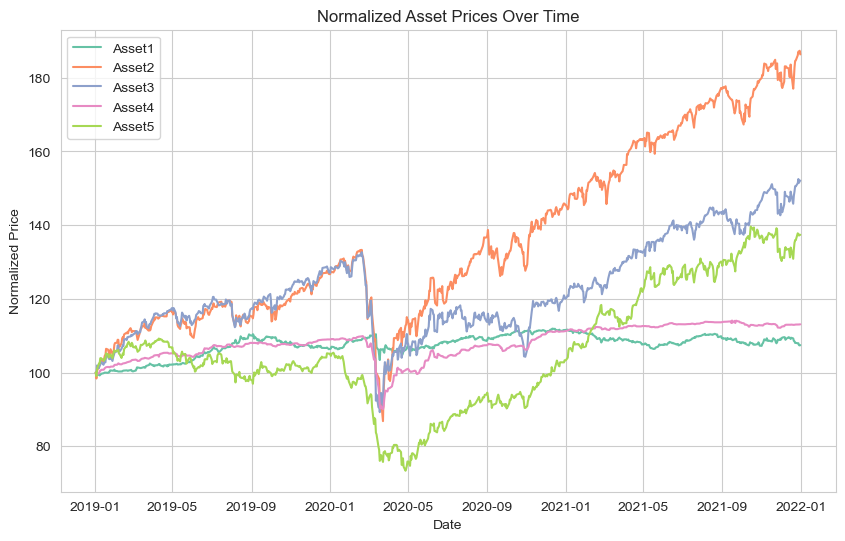

In [10]:
palette = sns.color_palette("Set2", n_colors=5)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
for i, asset in enumerate(['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']):
    plt.plot(normalized_df.index, normalized_df[asset], label=asset, color = palette[i]) # As date was set as index, we can access it with .index

plt.title('Normalized Asset Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

Insights:
- Asset2 is the one that increases it price over time the most
- There is a generalized drop for all the assets prices during March 2020, coinciding with the emergence of COVID-19.
- Asset4 and Asset1 have a similar linear behaviour.
- Asset2, Asset3 and Asset5 have also a similar behaviour with a tendency to increase over time.

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

The calculation of the daily percentage return follows this formula:

$$
 \text{Daily Return} = \frac{\text{Price on Day t} - \text{Price in Day (t-1)}}{\text{Price on Day (t-1)}} \times 100
$$

This formula calculates the percentage change between two consecutive days for each asset.

In [11]:
# For the calculation of the daily return pct_change() can be used
# Calculate percentage changes (daily returns) for all assets
daily_return_df = asset_df.pct_change() * 100
daily_return_df

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2019-01-04,-0.273984,2.095422,2.525524,-0.112542,1.924221
2019-01-07,-0.151170,1.263162,-0.733753,0.185572,1.479175
2019-01-08,-0.153486,0.100285,0.703977,0.360533,-0.019179
...,...,...,...,...,...
2021-12-27,-0.091306,0.738415,0.543901,0.000000,1.344319
2021-12-28,0.006442,0.548309,0.759918,0.000000,-0.114106
2021-12-29,-0.486243,-0.158812,-0.664707,0.017523,-0.314151


<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [12]:
# Dataframe with numerical variables
num = daily_return_df.select_dtypes(include="number")

# Correaltion matrix of numerical variables Series with 2 decimals --> PEARSON
num_corr = round(num.corr(), 2)

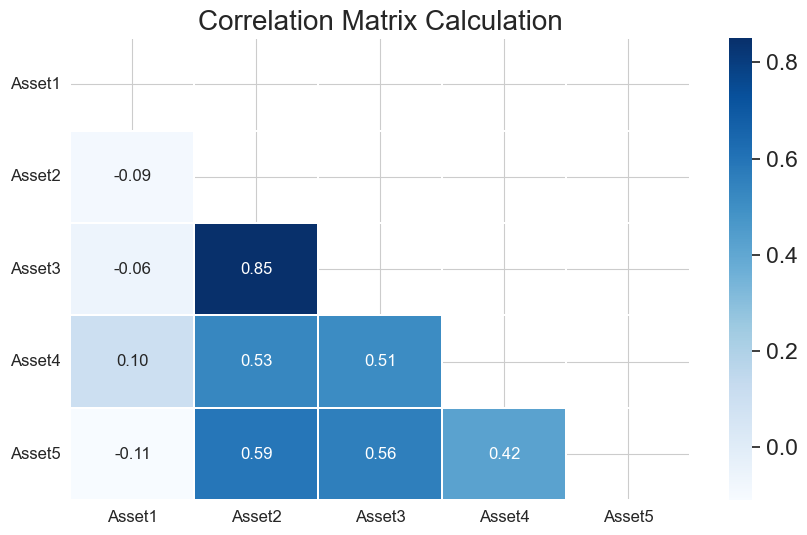

In [13]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(10, 6))
sns.set_theme(font_scale=1.5) # increase font size
ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.2, cmap="Blues", fmt=".2f", ax=ax) # round to 2 decimal places

ax.set_title("Correlation Matrix Calculation", fontsize=20) # add title
# Modify the tick labels for both axes (column names)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=0)  # Adjust font size and rotation
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, rotation=0)  # Adjust font size for y-axis (no rotation)

plt.show()

**Insights:**

- **Strong Positive Correlation** between Asset2 and Asset3 Daily Percentage Return
- **Moderate Positive Correlation** between Asset2 and Asset5, Asset3 and Asset5, Asset2 and Asset4, Asset3 and Asset4.
  

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

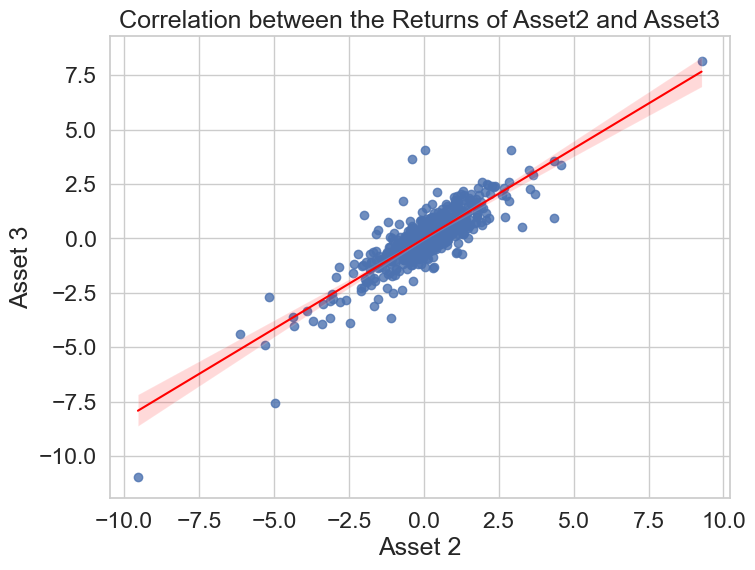

In [14]:
# Scatter Plot between the Returns of Asset2 and Asset3
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=daily_return_df["Asset2"],
    y=daily_return_df["Asset3"],
    line_kws={"color": "red", "linewidth": 1.5},
    ax=ax
)
plt.title('Correlation between the Returns of Asset2 and Asset3')
plt.xlabel('Asset 2')
plt.ylabel('Asset 3')
plt.show()

In [15]:
# Spearman correlation to prove that the correlation is not monotonic, but just linear
daily_return_df['Asset2'].corr(daily_return_df['Asset3'], method='spearman')

# Since Pearson (0.89) is greater than Spearman (0.77) it can be confirmed that it is a positive linear correlation

0.7692345921781872

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

In [16]:
data2 = pd.read_csv('../dataset/portfolio_weights.csv')
portfolio_df = data2.copy()
portfolio_df.head(10)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974
5,2019-01-09,0.225458,0.116255,0.265003,0.23031,0.162974
6,2019-01-10,0.225458,0.116255,0.265003,0.23031,0.162974
7,2019-01-11,0.225458,0.116255,0.265003,0.23031,0.162974
8,2019-01-14,0.225458,0.116255,0.265003,0.23031,0.162974
9,2019-01-15,0.225458,0.116255,0.265003,0.23031,0.162974


In [17]:
portfolio_df['Asset5'].unique()

array([0.16297443, 0.24108449, 0.15835551])

In [18]:
# Checking for NaNs
portfolio_df.isnull().sum()

date      0
Asset1    0
Asset2    0
Asset3    0
Asset4    0
Asset5    0
dtype: int64

In [19]:
# Change date from object to datetime
print(portfolio_df.dtypes)
portfolio_df['date'] = pd.to_datetime(portfolio_df['date'])

date       object
Asset1    float64
Asset2    float64
Asset3    float64
Asset4    float64
Asset5    float64
dtype: object


In [20]:
# Set the index column as an index
portfolio_df.set_index('date', inplace=True)

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

Since the Asset Weights change by year, I will create a new DataFrame with the weight for each year.

In [21]:
# Create a new dataframe and a new column called year
area_chart_df = portfolio_df.copy()
area_chart_df.index = pd.to_datetime(portfolio_df.index)
area_chart_df['year'] = area_chart_df.index.year

In [22]:
# Drop the index column 
area_chart_df.reset_index(drop=True, inplace=True)

In [23]:
# Check and drop duplicates
print(area_chart_df.duplicated().sum())
area_chart_df.drop_duplicates(inplace = True)

780


In [24]:
# Make year column as an index datetime
area_chart_df['year'] = area_chart_df['year'].astype(str)
area_chart_df['year'] = pd.to_datetime(area_chart_df['year'], format='%Y').dt.to_period('Y')
area_chart_df.set_index('year', inplace=True)

In [25]:
area_chart_df

,Asset1,Asset2,Asset3,Asset4,Asset5
year,,,,,
2019,0.225458,0.116255,0.265003,0.230310,0.162974
2020,0.321749,0.127529,0.123941,0.185697,0.241084
2021,0.071307,0.266093,0.168775,0.335470,0.158356


In [26]:
# Change the order of the columns for a better visualization
area_chart_df = area_chart_df[['Asset1', 'Asset5', 'Asset3', 'Asset4', 'Asset2']]

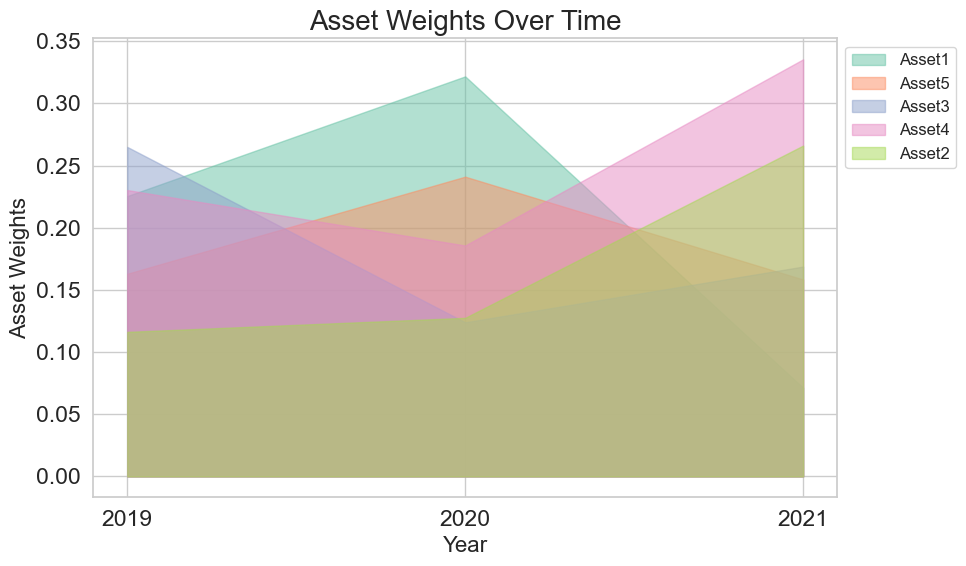

In [27]:
# Assuming your year column is already set as the index and data is cleaned
fig, ax = plt.subplots(figsize=(10, 6))

# Convert the PeriodIndex to the year (integer)
area_chart_df.index = area_chart_df.index.year

# Extract the x-values (index as year) and y-values (asset weights)
x = area_chart_df.index  # The x-values (years)
y_values = [area_chart_df[asset] for asset in ['Asset1', 'Asset5', 'Asset3', 'Asset4', 'Asset2']]

# Create a color palette with 5 colors
palette = sns.color_palette("Set2", n_colors=5)

# Set figure and axis background to 'none' to remove background color
ax.set_facecolor('white')

# Plot each asset weight using fill_between (non-stacked)
for i, asset in enumerate(['Asset1', 'Asset5', 'Asset3', 'Asset4', 'Asset2']):
    ax.fill_between(x, y_values[i], label=asset, color=palette[i], alpha=0.5)

# Add title and labels
ax.set_title('Asset Weights Over Time', fontsize=20)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Asset Weights', fontsize=16)

# Manually set the x-axis labels to show years
ax.set_xticks(x)
ax.set_xticklabels([str(year) for year in x])

# Add a legend with more space around the plot to prevent overlap
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adjust layout to make space for the legend
plt.tight_layout()  # Automatically adjusts subplots to fit into the figure area.
plt.subplots_adjust(right=0.8)  # Increase space to the right for the legend

# Show the plot
plt.tight_layout()
plt.show()

Insights:
- During 2019, the asset weight that increased the most was **Asset3**
- For 2020, **Asset1** achieved the biggest increase
- After 2021, **Asset4** was the one with the highest weight
- At the end, **Asset2** and **Asset4** were the ones with a higher growth.

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

**Historical cumulative returns of a portfolio** represent the total return on the portfolio over a specific period of time. To calculate it, I will follow these steps:

1. **Calculate daily returns for each Asset.** Which I have already done previously.

2. **Multiply each Asset's daily return by its Portfolio Weight:**
$$
 \text{Weighted Daily Return} = \text{Asset Daily Return} \times \text{Asset Weight}
$$

3. **Sum the Weighted Returns to get the Portfolio Daily Return:**
$$
\text{Portfolio Daily Return}_t = \sum_{i=1}^{n} \left( \text{Weighted Daily Return}_{i,t} \right)
$$

4. **Calculate the Cumulative Return:** is the product of the daily returns (incremented by 1) for each day from the start date to the end date, minus 1. This is calculated using ``cumprod()``.
$$
\text{Cumulative Return}_t = \prod_{i=1}^{t} \left( 1 + \text{Portfolio Daily Return}_i \right) - 1
$$

In [28]:
# Check if the indexes of both dataframes are equal
indexes_are_equal= daily_return_df.index.equals(portfolio_df.index)
indexes_are_equal

True

In [29]:
# Step 1: For the calculation of the daily return we can use daily_return_df 
# where we have already performed the calculation of daily returns

# Step 2: Multiply daily returns by asset weights
weighted_returns = (daily_return_df/100) * portfolio_df # divide it by 0 because I had the daily percentage 

# Step 3: Calculate portfolio daily returns by summing the weighted returns
portfolio_daily_returns = weighted_returns.sum(axis=1)

# Step 4: Calculate the cumulative return using .cumprod()
cumulative_return = (1 + portfolio_daily_returns).cumprod() - 1

# Add cumulative return to a new Series in the portfolio DataFrame
portfolio_df['Cumulative Return'] = cumulative_return

In [30]:
portfolio_df

,Asset1,Asset2,Asset3,Asset4,Asset5,Cumulative Return
date,,,,,,
2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974,0.000000
2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974,-0.005997
2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974,0.005322
2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974,0.007354
2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974,0.009807
...,...,...,...,...,...,...
2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356,0.384885
2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356,0.388438
2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356,0.385203


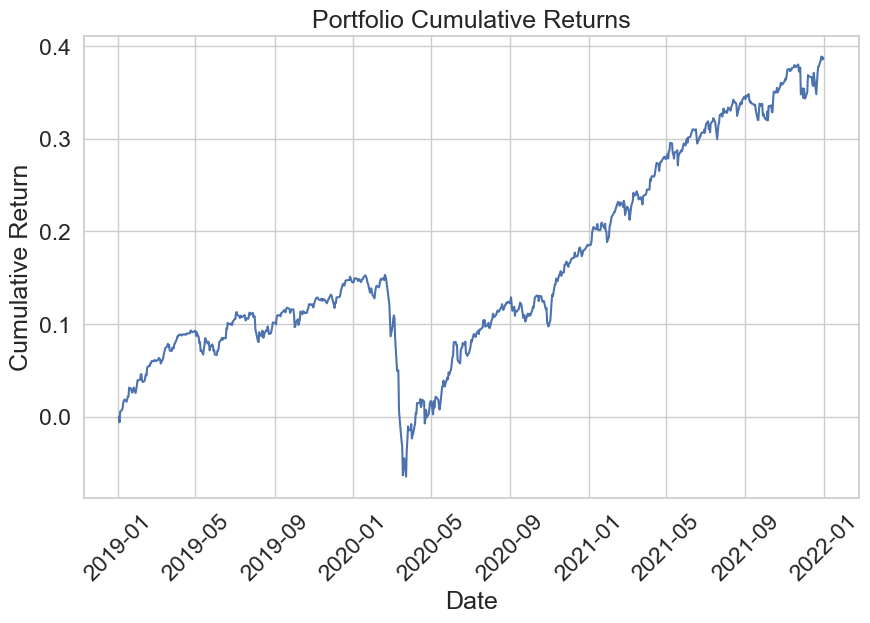

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(portfolio_df.index, portfolio_df['Cumulative Return']) 
plt.title('Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

plt.xticks(rotation=45)
plt.show()

Insights:
- **Overall Portfolio Growth:** the portfolio has increased as the cumulative return at the end of the period is higher than at the beggining.
- **Performance in Different Time Periods:** there are no sharp spikes, showing a continious growth, with the drawdown exception during 2020-04 (probably COVID related).

<h2 style="color: #FF6347;">Annualized Return.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

The **annualized return formula**, given that we already have the cumulative return over a perid, is:
$$
\text{Annualized Return (CAGR)} = \left( 1 + \text{Cumulative Return} \right)^{\frac{1}{\text{years}}} - 1
$$
Where:
- **Cumulative Return:** The total return over the period (from the previous step).
- **T:** The total time in years, which you can calculate as the number of days divided by 261 (assuming 261 days in a year).

In [32]:
# Get the first and the las date from the dataframe
first_date = portfolio_df.index[0]
last_date = portfolio_df.index[-1]

# Calculate the number of years
trading_days = 261
num_years = (last_date-first_date).days / trading_days

annualized_return = (1 + cumulative_return.iloc[-1]) ** (1/num_years) - 1

# Result
print(f"Annualized Portfolio Return: {annualized_return * 100:.2f}%")

Annualized Portfolio Return: 8.09%


Insights:
- The Annualized Portfolio Return of **8.09%** shows us how much the portfolio has grown in a year.
- When compared the return with broad marked indices like the S&P 500, which has returned around 7%-10% annually over long periods, it can be considered a good performance.
- A higher return might be associated with higher volatility, for that we want to dive into the Annualized Volatility.

<h2 style="color: #FF6347;">Annualized Volatility.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

To calculate the **annualized volaitity** of a portfolio, I will follow these steps:

1. **Daily Portfolio Returns:** this has already been calculated previously.

2. **Portfolio Volatility (Daily Volatility):** the standard deviation of the daily portfolio returns defined by the following formula.
$$
\sigma_{\text{daily}} = \sqrt{\frac{1}{T} \sum_{t=1}^{T} \left( R_{\text{portfolio}, t} - \bar{R}_{\text{portfolio}} \right)^2}
$$

3. **Annualized Volatility:** annualize the portfolio volatility from daily volatility (assumung 261 days).
$$
\sigma_{\text{annualized}} = \sigma_{\text{daily}} \times \sqrt{261}
$$

In [40]:
# Step 1: Daily Portfolio Returns: we already have it portfolio_daily_returns 

# Step 2: Portfolio Volatility (daily) -- > Standard deviation of daily returns
daily_volatility = portfolio_daily_returns.std()

# Step 3: Annualized volatility
annualized_volatility = daily_volatility * np.sqrt(261)

# Result
print(f"Annualized Portfolio Volatility: {annualized_volatility* 100:.2f}%")

Annualized Portfolio Volatility: 8.51%


Insights:
- An annualized volatility of **8.51%** indicates how much the portfolio’s returns typically vary from the average return on a yearly basis.
- This can be considered as a **moderate volatility**, which indicates that the portfolio has some fluctuations.

<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [45]:
# Read the CVS
data3 = pd.read_csv('../dataset/asset_information_data.csv')
family_df = data3.copy()
family_df

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


In [46]:
# Order the columns
n_area_chart_df = area_chart_df[['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']]

# Transpose the dataframe to have years as columns
n_area_chart_df = n_area_chart_df.T

# Rename the first column, where assets name are
n_area_chart_df.rename_axis('Name', inplace=True)
n_area_chart_df

year,2019,2020,2021
Name,,,
Asset1,0.225458,0.321749,0.071307
Asset2,0.116255,0.127529,0.266093
Asset3,0.265003,0.123941,0.168775
Asset4,0.230310,0.185697,0.335470
Asset5,0.162974,0.241084,0.158356


In [47]:
# Merge the two DataFrames on Name
assets_fam_df = n_area_chart_df.merge(family_df, on= "Name", how='inner')
assets_fam_df

,Name,2019,2020,2021,Family
0,Asset1,0.225458,0.321749,0.071307,Fixed Income
1,Asset2,0.116255,0.127529,0.266093,Fixed Income
2,Asset3,0.265003,0.123941,0.168775,Equity
3,Asset4,0.230310,0.185697,0.335470,Equity
4,Asset5,0.162974,0.241084,0.158356,Alternative


In [48]:
# Pivot table to have the sum of the weights for each family
pivot_df = assets_fam_df.pivot_table(index=['Family'], values=[2019, 2020, 2021], aggfunc='sum').round(4)

# transpose again to have the years as index
pivot_df = pivot_df.T

In [49]:
# Change the order of the columns for better visualization
pivot_df = pivot_df[['Equity', 'Fixed Income', 'Alternative']]
pivot_df

Family,Equity,Fixed Income,Alternative
2019,0.4953,0.3417,0.1630
2020,0.3096,0.4493,0.2411
2021,0.5042,0.3374,0.1584


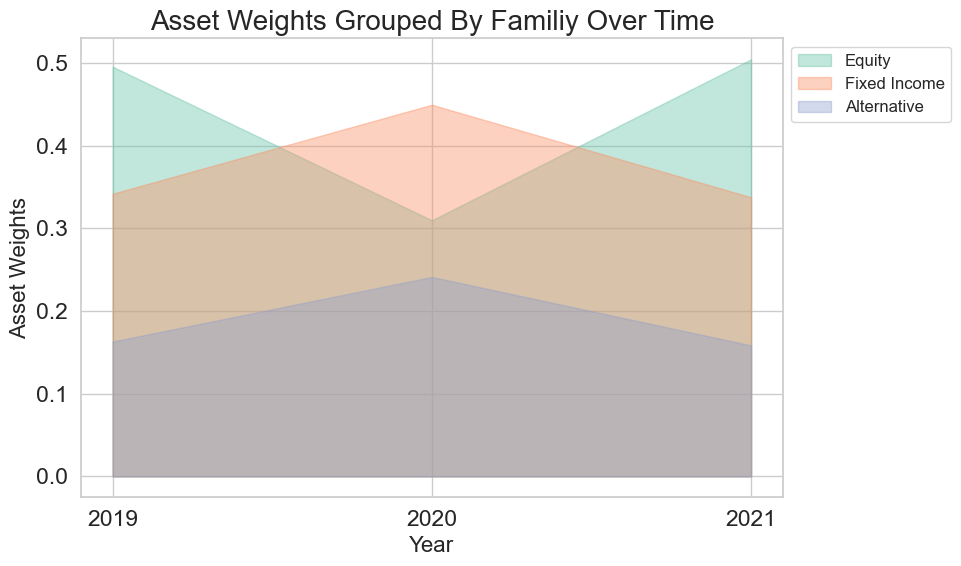

In [60]:
# Plot the area chart
fig, ax = plt.subplots(figsize=(10, 6))

# Convert the PeriodIndex to the year (integer) for x-axis
#x = pivot_df.index  # The x-values (years)
x = pivot_df.index.astype(int)
y_values = pivot_df.values.T  # The y-values (asset weights, transposed)

# Create a color palette with 3 colors (since there are 3 assets)
palette = sns.color_palette("Set2", n_colors=3)

# Set figure and axis background to 'none' to remove background color
ax.set_facecolor('white')

# Plot each asset weight using fill_between
for i, asset in enumerate(pivot_df.columns):
    ax.fill_between(x, y_values[i], label=asset, color=palette[i], alpha=0.4)

# Add title and labels
ax.set_title('Asset Weights Grouped By Familiy Over Time', fontsize=20)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Asset Weights', fontsize=16)

# Manually set the x-axis labels to show years
ax.set_xticks(x)
ax.set_xticklabels([str(year) for year in x])

# Add a legend with more space around the plot to prevent overlap
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adjust layout to make space for the legend
plt.tight_layout()  # Automatically adjusts subplots to fit into the figure area.
plt.subplots_adjust(right=0.8)  # Increase space to the right for the legend

# Show the plot
plt.show()


Insights: 
- **Fixed income** and **Alternative** families both behave in a same way
- **Equity** family does the opposite. However is the one with highest weight at the end of the period.